In [1]:
import subprocess
import tempfile
import random
import matplotlib.pyplot as plt
import numpy as np
import time

Primero defino algunas funciones útiles: <br>
<ul>
    <li> write_fasta() --> hace un temporal para pasarlo a needle </il>
    <li> run_needle() --> corre el needle </li>
    <li> secuencia_azar --> da una secuencia al azar </li>
    <li> get_score --> a partir de un archivo temporal retorna el score </li>
</ul>


In [2]:
secuencia_a = 'GCTAATCAGTGCATCGATCT'
secuencia_b = 'GTTGACATCTGCATGCTAGA'

# Guardar las secuencias en archivos FASTA temporales
def write_fasta(seq, name):
    f = tempfile.NamedTemporaryFile(delete=False, mode='w', suffix='.fasta')
    f.write(f'>{name}\n{seq}\n')
    f.close()
    return f.name

# Ejecutar needle
def run_needle(fasta1, fasta2, outfile):
    cmd = [
        'needle',
        '-asequence', fasta1,
        '-bsequence', fasta2,
        '-gapopen', '10',
        '-gapextend', '0.5',
        '-outfile', outfile
    ]
    subprocess.run(cmd, check=True)

# Función para generar una secuencia aleatoria de 20 bases
def secuencia_azar(k=20):
    return ''.join(random.choices(['A', 'C', 'G', 'T'], k=k))

# Función para correr needle y obtener el score
def get_score(seq_a, seq_b):
    out_file = '/tmp/needle_out.txt'
    run_needle(seq_a, seq_b, out_file)
    score = None
    with open(out_file) as f:
        for line in f:
            if line.startswith('# Score:'):
                score = float(line.split()[-1])
                break
    return score

In [3]:
# Primero vamos a ver el score de nuestra secuencia base

seq_a = write_fasta(secuencia_a, 'seq1')
seq_b = write_fasta(secuencia_b, 'seq2')

# Leer y mostrar el resultado y extraer el score
score = get_score(seq_a, seq_b)
print(f"Score de la alineación entre la secuencia base: {score}")


Score de la alineación entre la secuencia base: 16.0


Needleman-Wunsch global alignment of two sequences


Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Muestras tomadas: 1000
p-value estimado: 0.616
desviación estándar: 0.4866012543970482


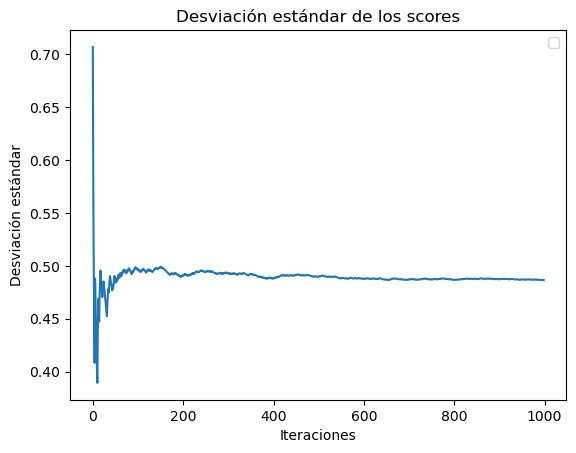

In [4]:
# Parámetros
umbral_score = 16   # Es el score que nos da la secuencia base
max_iter = 1000     # Cantidad de iteraciones

# Inicialización
resultados = []
std_array = []
media = None
std = None

for i in range(max_iter):
    seq_rand = secuencia_azar()
    seq_rand_file = write_fasta(seq_rand, 'seq_rand')
    seq_b_file = write_fasta(secuencia_b, 'seq_b')
    score = get_score(seq_rand_file, seq_b_file)
    es_significativo = 1 if score >= umbral_score else 0
    resultados.append(es_significativo)
    if len(resultados) > 1:
        std = np.std(resultados, ddof=1)
        std_array.append(std)

print(f'Muestras tomadas: {len(resultados)}')
print(f'p-value estimado: {np.mean(resultados)}')
print(f'desviación estándar: {std}')

# Graficar std_array
plt.plot(std_array)
plt.xlabel('Iteraciones')
plt.ylabel('Desviación estándar')
plt.title('Desviación estándar de los scores')
plt.legend()
plt.show()

In [5]:
import math
from scipy.stats import norm

# Nivel de confianza deseado (por ejemplo, 0.995 para 99.5%)
confianza = 0.995
alfa = 1 - confianza

# Proporción más conservadora
p = 0.63
E = 0.01  # Margen de error deseado

# Calcular Z usando alfa
Z = norm.ppf(1 - alfa/2)
print(f'Para un nivel de confianza de {confianza*100:.1f}%, Z = {Z:.3f}')

n = (Z**2 * p * (1 - p)) / (E**2)
print('Tamaño de muestra mínimo:', math.ceil(n))

Para un nivel de confianza de 99.5%, Z = 2.807
Tamaño de muestra mínimo: 18367


Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Muestras tomadas: 40000
p-value estimado: 0.619325
desviación estándar: 0.4855588929892686


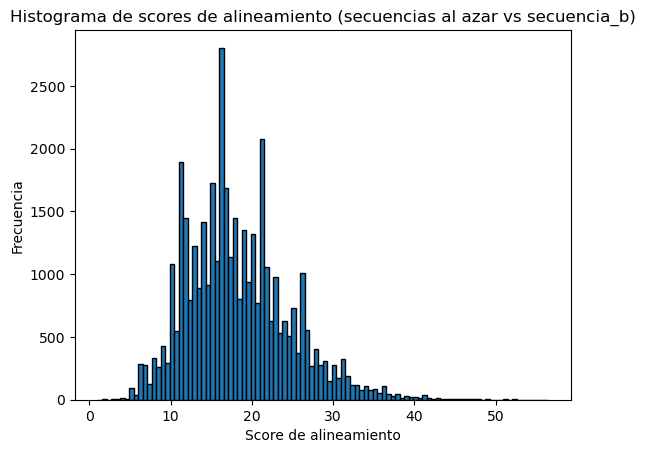

In [6]:
# Parámetros
umbral_score = 16   # Es el score que nos da la secuencia base
max_iter = 40000     # Cantidad de iteraciones

# Inicialización
resultados = []
std_array = []
media = None
std = None

scores_azar = []
for i in range(max_iter):
    seq_rand = secuencia_azar()
    seq_rand_file = write_fasta(seq_rand, 'seq_rand')
    seq_b_file = write_fasta(secuencia_b, 'seq_b')
    score = get_score(seq_rand_file, seq_b_file)
    scores_azar.append(score)
    es_significativo = 1 if score >= umbral_score else 0
    resultados.append(es_significativo)
    if len(resultados) > 1:
        std = np.std(resultados, ddof=1)
        std_array.append(std)

print(f'Muestras tomadas: {len(resultados)}')
print(f'p-value estimado: {np.mean(resultados)}')
print(f'desviación estándar: {std}')

# Graficar histograma de los scores
plt.hist(scores_azar, bins=100, edgecolor='black')
plt.xlabel('Score de alineamiento')
plt.ylabel('Frecuencia')
plt.title('Histograma de scores de alineamiento (secuencias al azar vs secuencia_b)')
plt.show()

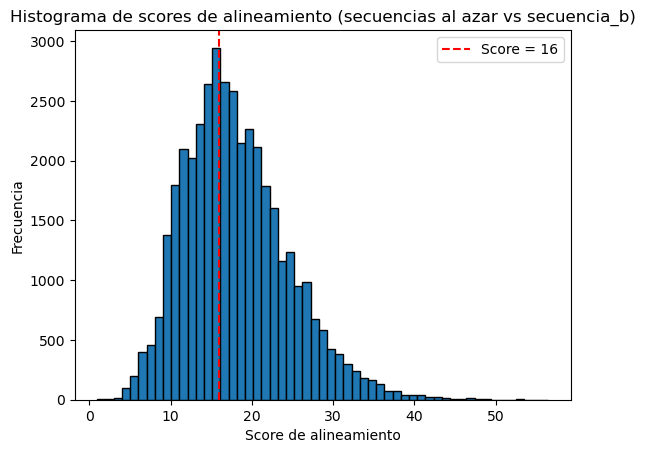

In [9]:
plt.hist(scores_azar, bins=55, edgecolor='black')
plt.xlabel('Score de alineamiento')
plt.ylabel('Frecuencia')
plt.title('Histograma de scores de alineamiento (secuencias al azar vs secuencia_b)')
plt.axvline(x=16, color='red', linestyle='--', label='Score = 16')
plt.legend()
plt.show()